In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import boto3

from common import dataManagement
from db import hvacDBMapping

In [2]:
bucket='octank-america-sagemaker-resources'
train_prefix = 'training'
data_key = 'thermafuser_readings.csv'
data_location = 's3://{}/{}/{}'.format(bucket, train_prefix, data_key)

In [3]:
thermafuser_df_backup = pd.read_csv(data_location, low_memory=False, index_col=False)
thermafuser_df_backup.head()

,Unnamed: 0,_thermafuserId,_roomOccupied,_supplyAir,_timestamp,_occupiedCoolingSetpoint,_terminalLoad,_zoneTemperature,_airflowFeedback,_occupiedHeatingSetpoint
0,0,1,True,75.199997,2018-07-11 14:15:00,76.0,NaN,74.699997,63.0,70.0
1,1,2,True,76.400002,2018-07-11 14:15:00,76.0,NaN,76.400002,21.0,70.0
2,2,3,True,75.699997,2018-07-11 14:15:00,76.0,NaN,76.800003,21.0,70.0
3,3,4,True,68.900002,2018-07-11 14:15:00,76.0,NaN,76.500000,82.0,70.0
4,4,5,True,57.799999,2018-07-11 14:15:00,72.0,NaN,71.699997,69.0,70.0


In [4]:
thermafuser_df = thermafuser_df_backup.copy(deep=True)
thermafuser_df = thermafuser_df.drop('Unnamed: 0', axis=1)
thermafuser_df = thermafuser_df.loc[thermafuser_df['_thermafuserId'] == 1]
thermafuser_df.reset_index(inplace=True, drop=True)

In [5]:
col_names = {'_roomOccupied':'RoomOccupied', '_supplyAir':'SupplyAir', 
             '_occupiedCoolingSetpoint':'OccupiedCoolingSetpoint', '_terminalLoad':'TerminalLoad', 
            '_zoneTemperature':'ZoneTemperature', '_airflowFeedback':'AirflowFeedback', 
            '_occupiedHeatingSetpoint':'OccupiedHeatingSetpoint', '_timestamp':'Timestamp'}

thermafuser_df = thermafuser_df.drop('_thermafuserId', axis=1)
thermafuser_df = thermafuser_df.rename(columns=col_names)

In [6]:
thermafuser_df['Timestamp'] = pd.to_datetime(thermafuser_df['Timestamp'])
thermafuser_df.head()

,RoomOccupied,SupplyAir,Timestamp,OccupiedCoolingSetpoint,TerminalLoad,ZoneTemperature,AirflowFeedback,OccupiedHeatingSetpoint
0,True,75.199997,2018-07-11 14:15:00,76.0,NaN,74.699997,63.0,70.0
1,True,76.099998,2018-07-11 14:20:01,76.0,NaN,74.300003,61.0,70.0
2,True,75.900002,2018-07-11 14:25:01,76.0,NaN,74.900002,59.0,70.0
3,True,75.900002,2018-07-11 14:30:02,76.0,NaN,75.099998,76.0,70.0
4,True,75.699997,2018-07-11 14:35:04,76.0,NaN,75.599998,150.0,70.0


In [7]:
thermafuser_df = thermafuser_df.set_index('Timestamp')

In [8]:
thermafuser_df.head()

,RoomOccupied,SupplyAir,OccupiedCoolingSetpoint,TerminalLoad,ZoneTemperature,AirflowFeedback,OccupiedHeatingSetpoint
Timestamp,,,,,,,
2018-07-11 14:15:00,True,75.199997,76.0,NaN,74.699997,63.0,70.0
2018-07-11 14:20:01,True,76.099998,76.0,NaN,74.300003,61.0,70.0
2018-07-11 14:25:01,True,75.900002,76.0,NaN,74.900002,59.0,70.0
2018-07-11 14:30:02,True,75.900002,76.0,NaN,75.099998,76.0,70.0
2018-07-11 14:35:04,True,75.699997,76.0,NaN,75.599998,150.0,70.0


In [9]:
thermafuser_df_sub = thermafuser_df.loc['2018-07-11':'2018-07-20']
thermafuser_df_sub.head()

,RoomOccupied,SupplyAir,OccupiedCoolingSetpoint,TerminalLoad,ZoneTemperature,AirflowFeedback,OccupiedHeatingSetpoint
Timestamp,,,,,,,
2018-07-11 14:15:00,True,75.199997,76.0,NaN,74.699997,63.0,70.0
2018-07-11 14:20:01,True,76.099998,76.0,NaN,74.300003,61.0,70.0
2018-07-11 14:25:01,True,75.900002,76.0,NaN,74.900002,59.0,70.0
2018-07-11 14:30:02,True,75.900002,76.0,NaN,75.099998,76.0,70.0
2018-07-11 14:35:04,True,75.699997,76.0,NaN,75.599998,150.0,70.0


<AxesSubplot:xlabel='Timestamp'>

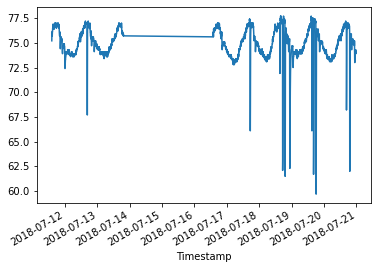

In [10]:
thermafuser_df_sub['SupplyAir'].plot()

In [38]:
idx = pd.date_range('2018-07-12', '2018-07-14', freq='5T')
print(idx)

DatetimeIndex(['2018-07-12 00:00:00', '2018-07-12 00:05:00',
               '2018-07-12 00:10:00', '2018-07-12 00:15:00',
               '2018-07-12 00:20:00', '2018-07-12 00:25:00',
               '2018-07-12 00:30:00', '2018-07-12 00:35:00',
               '2018-07-12 00:40:00', '2018-07-12 00:45:00',
               ...
               '2018-07-13 23:15:00', '2018-07-13 23:20:00',
               '2018-07-13 23:25:00', '2018-07-13 23:30:00',
               '2018-07-13 23:35:00', '2018-07-13 23:40:00',
               '2018-07-13 23:45:00', '2018-07-13 23:50:00',
               '2018-07-13 23:55:00', '2018-07-14 00:00:00'],
              dtype='datetime64[ns]', length=577, freq='5T')


In [39]:
thermafuser_df_sub = thermafuser_df_sub.asfreq('5T', method = 'backfill')
thermafuser_df_sub.head()

,RoomOccupied,SupplyAir,OccupiedCoolingSetpoint,TerminalLoad,ZoneTemperature,AirflowFeedback,OccupiedHeatingSetpoint
Timestamp,,,,,,,
2018-07-11 14:15:00,True,75.199997,76.0,NaN,74.699997,63.0,70.0
2018-07-11 14:20:00,True,76.099998,76.0,NaN,74.300003,61.0,70.0
2018-07-11 14:25:00,True,75.900002,76.0,NaN,74.900002,59.0,70.0
2018-07-11 14:30:00,True,75.900002,76.0,NaN,75.099998,76.0,70.0
2018-07-11 14:35:00,True,75.699997,76.0,NaN,75.599998,150.0,70.0


In [40]:
thermafuser_df_range = thermafuser_df_sub.loc[idx]
thermafuser_df_range.head()

,RoomOccupied,SupplyAir,OccupiedCoolingSetpoint,TerminalLoad,ZoneTemperature,AirflowFeedback,OccupiedHeatingSetpoint
2018-07-12 00:00:00,True,72.400002,76.0,NaN,75.199997,178.0,70.0
2018-07-12 00:05:00,True,72.400002,76.0,NaN,75.199997,103.0,70.0
2018-07-12 00:10:00,True,72.699997,76.0,NaN,75.199997,61.0,70.0
2018-07-12 00:15:00,True,73.000000,76.0,NaN,75.599998,57.0,70.0
2018-07-12 00:20:00,True,73.300003,76.0,NaN,75.599998,59.0,70.0


In [70]:
thermafuser_df_windowed = thermafuser_df_range.copy()
thermafuser_df_windowed['AirRolling'] = thermafuser_df_range['SupplyAir'].rolling(window=36).median()
thermafuser_df_windowed.head()

,RoomOccupied,SupplyAir,OccupiedCoolingSetpoint,TerminalLoad,ZoneTemperature,AirflowFeedback,OccupiedHeatingSetpoint,AirRolling
2018-07-12 00:00:00,True,72.400002,76.0,NaN,75.199997,178.0,70.0,NaN
2018-07-12 00:05:00,True,72.400002,76.0,NaN,75.199997,103.0,70.0,NaN
2018-07-12 00:10:00,True,72.699997,76.0,NaN,75.199997,61.0,70.0,NaN
2018-07-12 00:15:00,True,73.000000,76.0,NaN,75.599998,57.0,70.0,NaN
2018-07-12 00:20:00,True,73.300003,76.0,NaN,75.599998,59.0,70.0,NaN


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


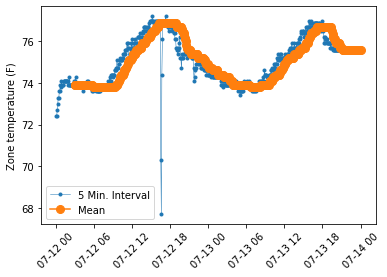

In [72]:
fig, ax = plt.subplots()
ax.plot(thermafuser_df_range.loc[:, 'SupplyAir'], marker='.', linestyle='-', linewidth=0.5, label='5 Min. Interval')
ax.plot(thermafuser_df_windowed.loc[:, 'AirRolling'], marker='o', linestyle='-', markersize=8, label='Mean')
_ = ax.set_ylabel('Zone temperature (F)')
_ = ax.legend()
plt.draw()
xticklabels = ax.get_xticklabels(minor=False)
_ = ax.set_xticklabels(xticklabels, Rotation=45)
plt.draw()

,RoomOccupied,SupplyAir,OccupiedCoolingSetpoint,TerminalLoad,ZoneTemperature,AirflowFeedback,OccupiedHeatingSetpoint,AirRolling
2018-07-12 00:00:00,True,72.400002,76.0,NaN,75.199997,178.0,70.0,NaN
2018-07-12 00:05:00,True,72.400002,76.0,NaN,75.199997,103.0,70.0,NaN
2018-07-12 00:10:00,True,72.699997,76.0,NaN,75.199997,61.0,70.0,NaN
2018-07-12 00:15:00,True,73.000000,76.0,NaN,75.599998,57.0,70.0,NaN
2018-07-12 00:20:00,True,73.300003,76.0,NaN,75.599998,59.0,70.0,NaN


In [67]:

plt.draw()

<Figure size 432x288 with 0 Axes>